# Unit 6 Lecture 2 - Exploratory Data Analysis

CAI 4823: Artificial Intelligence for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay.<br> 


## Notebook Learning Objectives
After studying this notebook, students should be able to:
- Understand how to conduct a basic **exploratory data analysis** 
- Understand basic components of an EDA, including data collection, data cleaning and preprocessing, descriptive statistics, univariate analysis, bivariate analysis, multivariate analysis, feature engineering, and visualization.
- Use the `titanic` dataset 

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical preliminary step in data science that involves **investigating the key characteristics, relationships, and patterns within a dataset to gain useful insights**.
 The main components of EDA typically include data collection, data cleaning and preprocessing, descriptive statistics, univariate analysis, bivariate analysis, multivariate analysis, feature engineering, and visualization.
 These components guide data scientists through understanding and exploring a dataset, although the specific stages can vary depending on the project's goals and the data's characteristics.

 A foundational aspect of EDA is **assessing data quality** by identifying issues such as errors, missing or inconsistent values, and outliers, which can severely impact downstream analysis and modeling efforts.
 This process often begins with a pure understanding of the original data, involving checks on column data types, null counts, and distinct values to grasp the dataset's structure.
 **Univariate analysis** focuses on studying individual variables to understand their distributions, central tendencies, and spread, using methods like histograms, box plots, and summary statistics such as mean, median, mode, variance, and standard deviation. **Bivariate analysis** examines the relationship between two variables, commonly using scatter plots and correlation coefficients to identify connections, dependencies, and correlations.
 **Multivariate analysis** extends this to explore relationships among three or more variables simultaneously, employing techniques like principal component analysis, cluster analysis, and correlation matrices to uncover complex patterns and groupings.

**Visualization** is a core component of EDA, making complex relationships and trends within the dataset easily comprehensible. Tools like histograms, box plots, bar charts, scatter plots, and more advanced visualizations such as small multiples and sparklines are used to detect anomalies, uncover uneven distributions, and recognize patterns or associations that may not be evident from summary statistics alone.
 **Feature engineering**, another key component, involves transforming and creating new variables from existing data to improve model performance and reveal deeper insights.
 
 In summary, Exploratory Data Analysis (EDA) is about making the dataset understandable before modeling—detecting errors, summarizing distributions, exploring relationships, and generating hypotheses. 

## Main Components of EDA
1.	__Data Collection & Import__
    -	Bringing the dataset into your environment (CSV, SQL, API, etc.).
    -	Ensuring proper formats for variables (numeric, categorical, datetime).
2.  __Data Overview__
    - understand dataset structure (columns, number of rows/columns, data types, missing values.)
3.	__Data Cleaning__
    -	Handling missing values (drop, impute, or flag).
    -	Fixing inconsistencies (e.g., string casing, duplicates).
    -	Detecting and treating outliers.
4.	__Descriptive Statistics & Data Visualization__
    -	**Univariate analysis**: summary statistics (mean, median, variance, quantiles).    
        -	Categorical summaries: frequency counts, mode.
        -	Distributions: histograms, density plots.
        -	Univariate plots: histograms, bar charts, boxplots.
    -	**Bivariate analysis**:
          - scatter plots, violin plots, and grouped bar plots.
    -	**Multivariate analysis**:
          - visualization: heatmaps, pairplots.
6.	__Feature Engineering__
    -	Create new variables to reveal hidden patterns
7.	__Correlation & Relationships__
    -	Correlation matrices for numeric variables.
    -	Categorical relationships with chi-square or ANOVA.
    -	Exploring interactions that might reveal patterns.
9.	__Hypothesis Generation__
    -	Based on insights, propose questions for modeling.
    -	Example: “Income and education level might predict spending habits.”


## 1. Data Collection & Import
**Description:** Bring the dataset into the analysis environment and load it.

In [95]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Data Overview
**Description:** Understand dataset structure — number of rows/columns, data types, missing values.

In [188]:
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  family_size  891 non-null    int64   
 16  age_group    714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(5), object(5)
memory usage: 88

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning
**Description:** Handle missing data, duplicates, and inconsistencies.

In [82]:
df = df.drop(columns=["deck", "embark_town"])   # too many nulls
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


## 4. Descriptive Statistics: Univariate Analysis
**Description:** Explore single variables — distributions, counts, summary statistics.

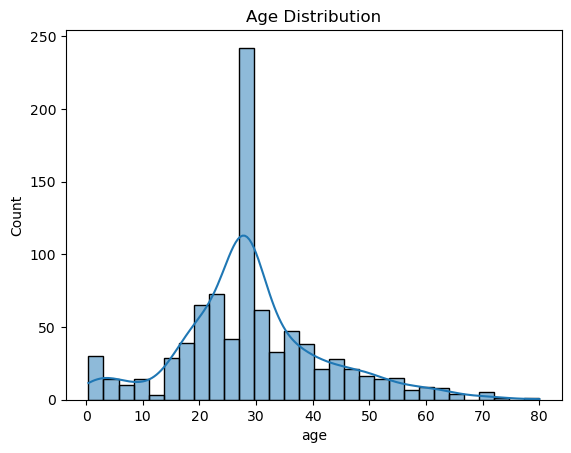

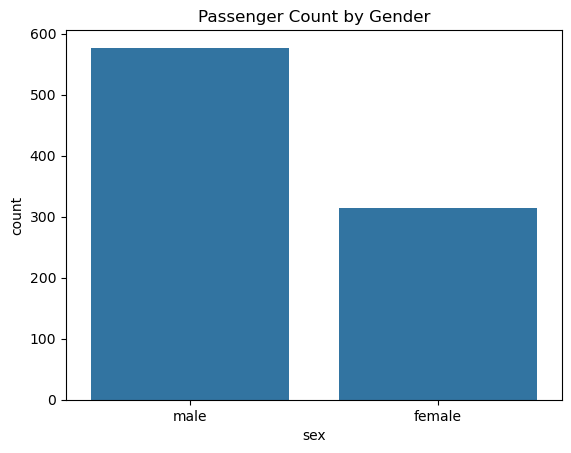

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x="sex", data=df)
plt.title("Passenger Count by Gender")
plt.show()

## 4. Descriptive Statistics: Bivariate Analysis
**Description:** Explore relationships between two variables.

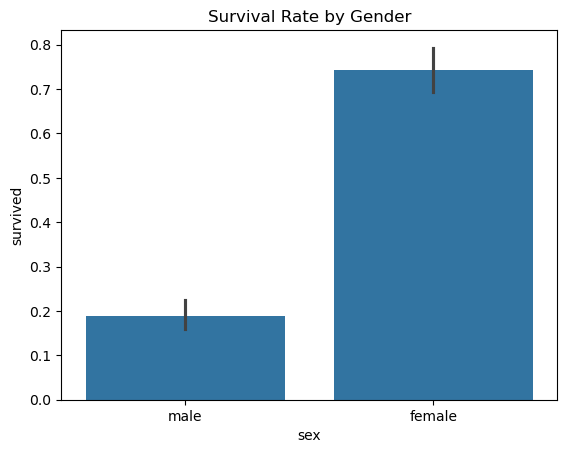

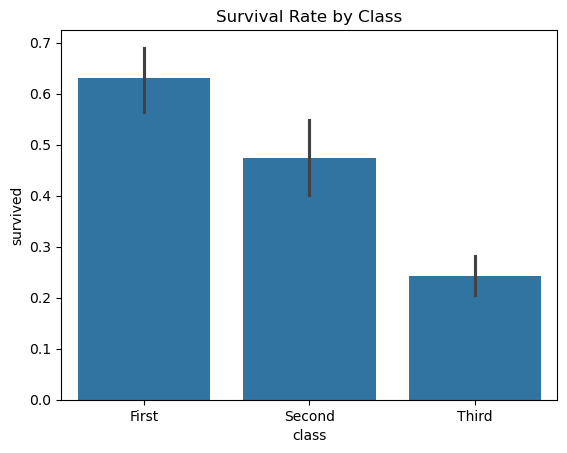

In [86]:
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x="class", y="survived", data=df,
            order=["First", "Second", "Third"])
plt.title("Survival Rate by Class")
plt.show()

## 4. Descriptive Statistics: Multivariate Analysis
**Description:** Examine interactions between three or more variables.

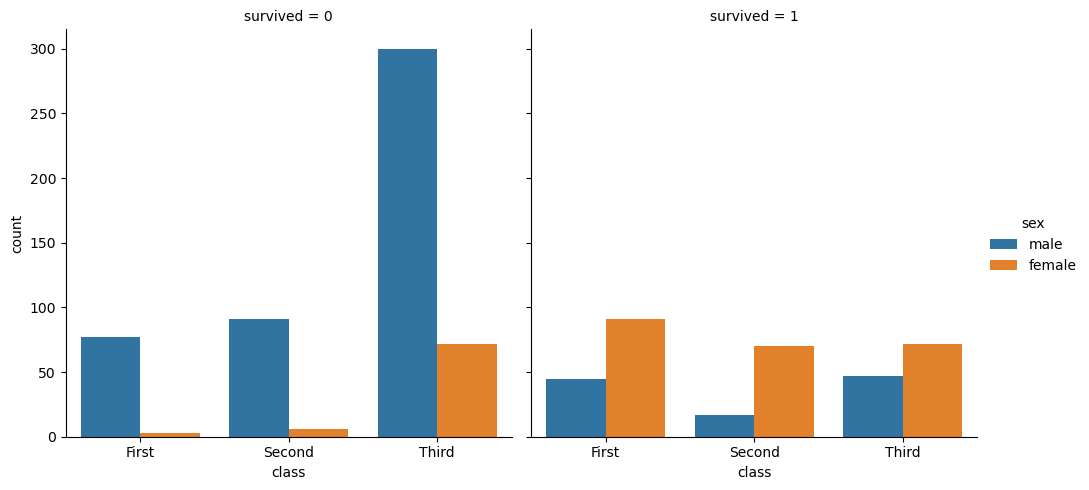

In [88]:
sns.catplot(x="class", hue="sex", col="survived",
            data=df, kind="count")

## 5. Feature Engineering
**Description:** Create new variables to reveal hidden patterns. In this example, let's create two new features: __family size__ and __age groups__. We calculate __family size__ using existing variables as follows.
- _sibsp_ = number of siblings and spouses traveling with the passenger
- _parch_ = number of parents and children traveling with the passenger
- 
Together, these two columns describe the size of a passenger’s immediate family group on board. By adding +1, we include the passenger in their own family group.

We calcular __age groups__ from the continuous age column using `pd.cut(x, bins, labels=None, right=True)`:
 - Ages 0–12 → labeled "Child"
 - Ages 13–18 → labeled "Teen"
 - Ages 19–40 → labeled "Adult"
 - Ages 41–60 → labeled "Middle-Aged"
 - Ages 61–80 → labeled "Senior"


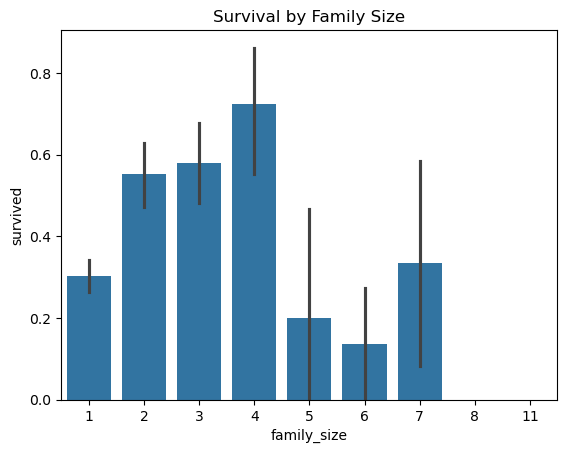

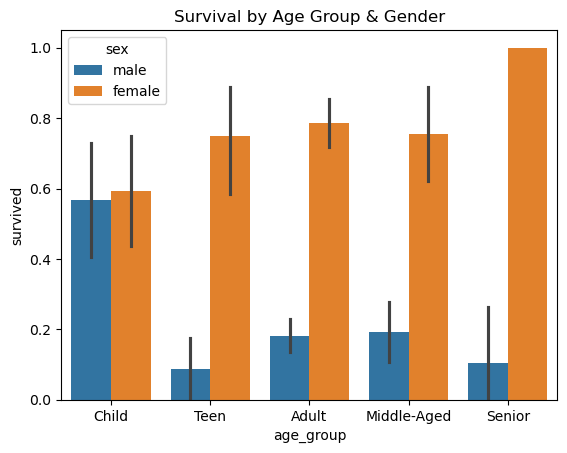

In [130]:
df["family_size"] = df["sibsp"] + df["parch"] + 1 

df["age_group"] = pd.cut(df["age"], [0,12,18,40,60,80],
                         labels=["Child","Teen","Adult","Middle-Aged","Senior"])

sns.barplot(x="family_size", y="survived", data=df)
plt.title("Survival by Family Size")
plt.show()

sns.barplot(x="age_group", y="survived", hue="sex", data=df)
plt.title("Survival by Age Group & Gender")
plt.show()

# 6. Correlation & Relationships

## 6.1 Correlation matrices for numeric variables.
**Description:** Summarize results visually to detect patterns and anomalies.

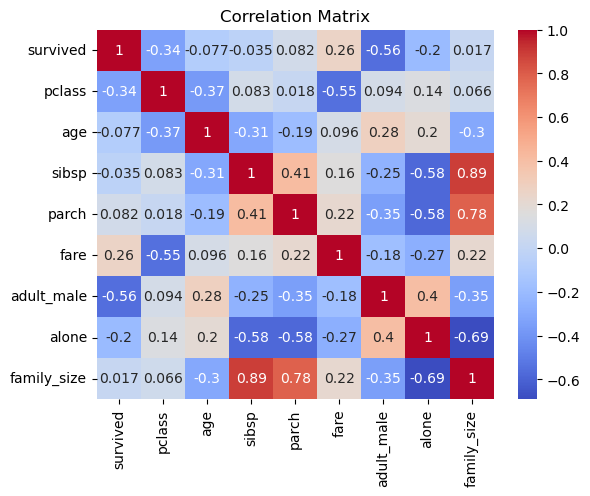

In [181]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Findings**: Fare and class correlate with survival; age less so.

## 6.2 Statistical Testing of categorical relationships with chi-square.
**Description:** Use hypothesis testing to check the significance of relationships.

In [191]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["sex"], df["survived"])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test (Gender vs Survival): p =", p)

contingency = pd.crosstab(df["class"], df["survived"])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test (Class vs Survival): p =", p)

Chi-square test (Gender vs Survival): p = 1.197357062775565e-58
Chi-square test (Class vs Survival): p = 4.549251711298793e-23


**Result**: Very low p-value → gender and class are statistically significant factors in survival.

## 10. Conclusion & Hypothesis Generation
**Description:** Summarize insights and generate hypotheses for modeling.

**Titanic Insights:**  
- Women and children had higher survival rates.  
- First-class passengers were much more likely to survive.  
- Large families were at a disadvantage.  
- Gender and class are statistically significant predictors of survival.  

**Hypothesis:**  
"Survival probability on the Titanic was strongly driven by socio-economic status and gender norms (‘women and children first’)."

## Apendix: Titanic Dataset — Field Descriptions
1. __survived__
    - Type: Integer (0 = No, 1 = Yes)
    - Description: Indicates whether the passenger survived (1) or not (0).
    - Target variable in most Titanic analyses.
      
2. __pclass__
    - Type: Categorical (1, 2, 3)
    - Description: Passenger class — a proxy for socio-economic status:
        * 1 = First class (wealthiest)
        * 2 = Second class
        * 3 = Third class (poorest)

3. __sex__
    - Type: Categorical (male, female)
    - Description: Biological sex of the passenger.
    - A major predictor of survival due to “women and children first” policy.

4. __age__
    - Type: Float (years)
    - Description: Age of the passenger. Some values are missing.
    - Includes children, adults, and elderly passengers.

5. __sibsp__
    - Type: Integer
    - Description: Number of siblings or spouses aboard the Titanic.
    - Example: “1” means the passenger traveled with one sibling or spouse.

6. __parch__
    - Type: Integer
    - Description: Number of parents or children aboard the Titanic.
    - Example: “2” means the passenger traveled with two parents/children.

7. __fare__
    - Type: Float (British pounds)
    - Description: Ticket price paid by the passenger.
    - Strongly correlated with class (pclass).

8. __embarked__
    - Type: Categorical (C, Q, S)
    - Description: Port of embarkation (where the passenger boarded):
        - C = Cherbourg (France)
        - Q = Queenstown (Ireland)
        - S = Southampton (UK, most common)

9. __class__
    - Type: Categorical (First, Second, Third)
    - Description: Human-readable version of pclass.
    - Redundant but easier for visualization.

10. __who__
    - Type: Categorical (man, woman, child)
    - Description: Simplified grouping of passengers:
        - “man” = adult male
        - “woman” = adult female
        - “child” = any passenger under 16

11. __adult_male__
    - Type: Boolean (True/False)
    - Description: Whether the passenger is an adult male (age >= 16 and sex == male).

12. __deck__
    - Type: Categorical (A–G, or NaN)
    - Description: Deck level of the cabin (when recorded).
    - Many missing values → often dropped in analysis.

13. __embark_town__
    - Type: Categorical (Cherbourg, Queenstown, Southampton)
    - Description: Human-readable version of embarked.
    - Redundant, but more interpretable.

14. __alive__
    - Type: Categorical (yes, no)
    - Description: Human-readable version of survived.

15. __alone__
    - Type: Boolean (True/False)
    - Description: Whether the passenger was traveling without family.
    - Derived from sibsp + parch == 0.

_Last updated on 9.5.2025 8:36pm<br>
(C) 2025 Complex Adaptive Systems Laboratory all rights reserved._